<a href="https://colab.research.google.com/github/Dimisz/DSc_and_ML_with_Python_Course/blob/main/Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Initial imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Seaborn is an abstraction over Matplotlib

**Topics**:
* Scatterplots
* Distribution Plots
* Categorical Plots
* Comparison Plots
* Seaborn Grids
* Matrix Plots

## Scatterplots
**Scatterplots** show the relationship between **two continuous features** (*continuous feature* - numeric varriable that can take any number of values between any two values, e.g. age, height, salary, temperature, prices).

Scatterplots lines up a set of two continuous features and plot them out as coordinates (x vs y).

In [2]:
# The dataset used is available from GitHub repo: https://raw.githubusercontent.com/Dimisz/DSc_and_ML_with_Python_Course/main/data/dm_office_sales.csv
!wget https://raw.githubusercontent.com/Dimisz/DSc_and_ML_with_Python_Course/main/data/dm_office_sales.csv

--2021-09-21 10:18:43--  https://raw.githubusercontent.com/Dimisz/DSc_and_ML_with_Python_Course/main/data/dm_office_sales.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59081 (58K) [text/plain]
Saving to: ‘dm_office_sales.csv’

dm_office_sales.csv 100%[===================>]  57.70K  --.-KB/s    in 0.01s   

2021-09-21 10:18:43 (4.99 MB/s) - ‘dm_office_sales.csv’ saved [59081/59081]



In [3]:
df = pd.read_csv("/content/dm_office_sales.csv")

In [4]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


1. **`hue`** can be used with both categorical and continuous variables
* when used with categorical vars, it will color each category with distinct color
* when used with continuous vars, it will create a gradient


2. **`palette`**: 
https://matplotlib.org/stable/tutorials/colors/colormaps.html
* *Perceptually uniform sequential colormaps* are specially designed to include color-blind people 

3. **`size`**: can be used to size based on a continuous variable (the bigger the value the bigger the size of a marker)

4. **`s`**: is general size of a marker

5. **`alpha`** : transparency, default is 1

6. **`style`** : assigns a marker a shape depending on the value (works similar to `hue`, just uses shape instead of color).

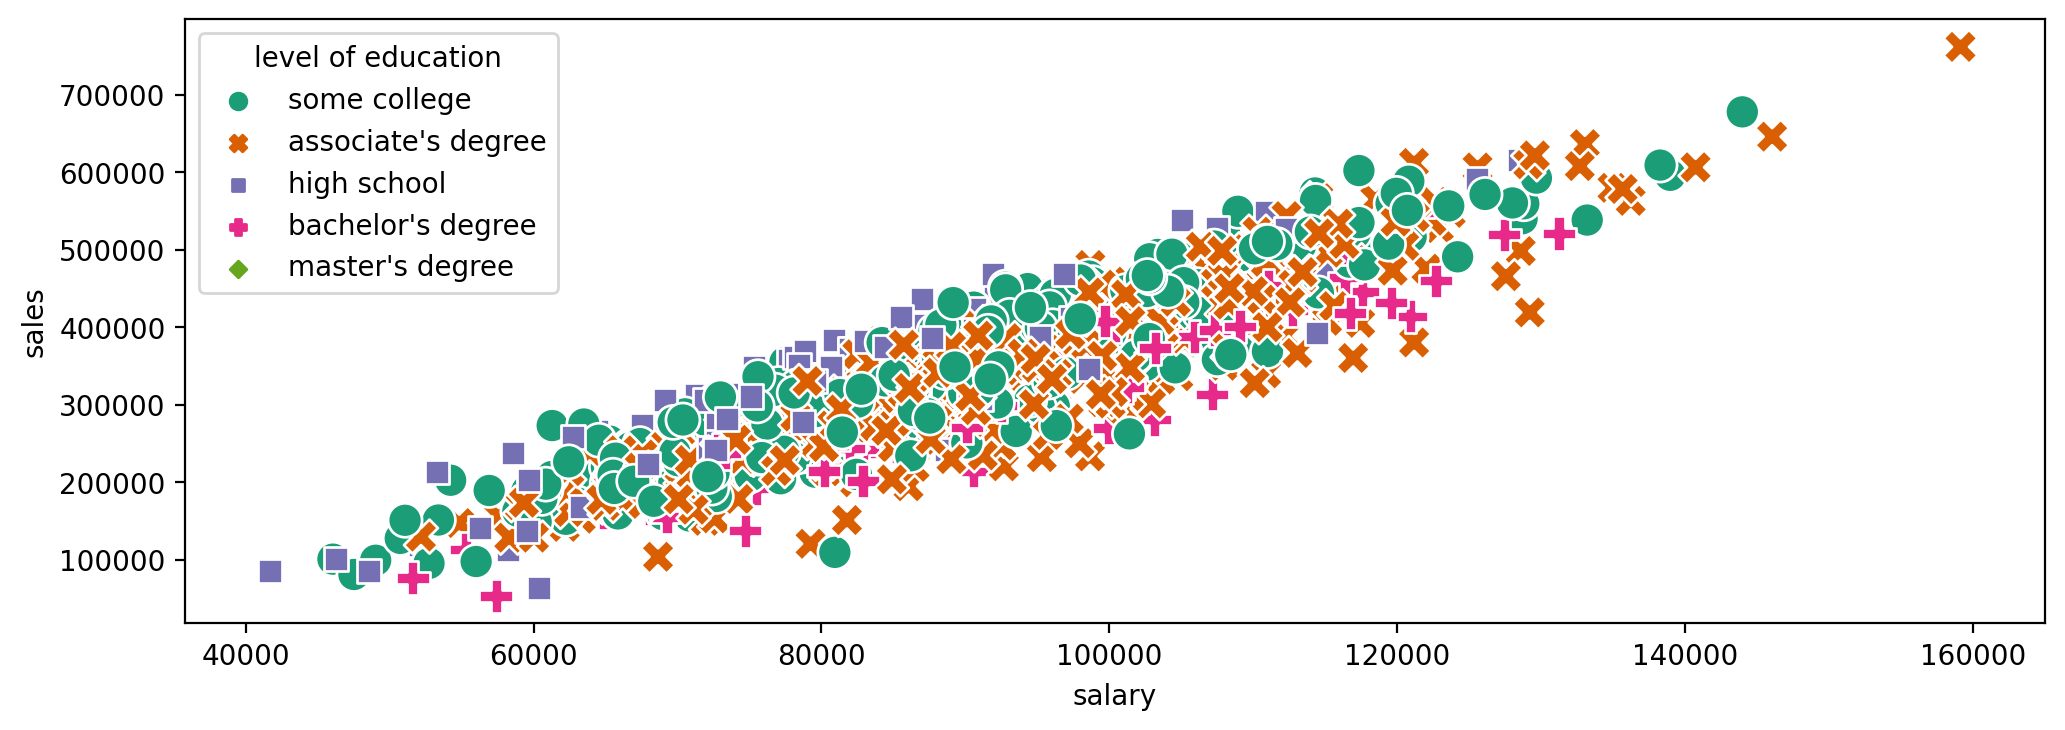

In [5]:
# Plot the correlation between salary and sales
plt.figure(figsize=(12,4), dpi=200)
sns.scatterplot(x='salary', y='sales',data=df,
                hue='level of education',
                style="level of education",
                palette='Dark2',
                s=150,
                # size="work experience",
                # alpha=0.5,
                ); 
#plt.savefig("my_plot.jpg")


## Distribution Plots

**Distribution plots** display a single continuous feature and help visuallize properties such as deviation and average values.

There are 3 main distribution plot types:
* Rug plot
* Histogram
* KDE Plot

In [6]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


### Rugplot

One can think of rugplot as a 1D scatterplot.

Since y-axis in a rugplot is meaningless, the `height` parameter (percentage of y-axis from 0 to 1) is used for purposes of convenience.

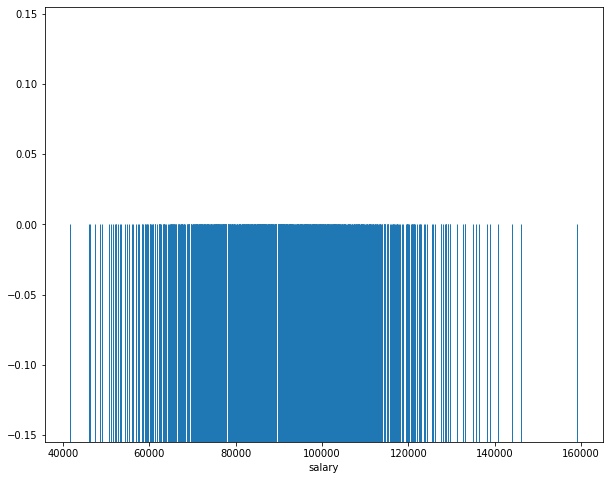

In [12]:
# Check distribution of salaries
plt.figure(figsize=(10,8))
sns.rugplot(x="salary", data=df, height=0.5);

### Histogram

`sns.displot`
`sns.histplot`

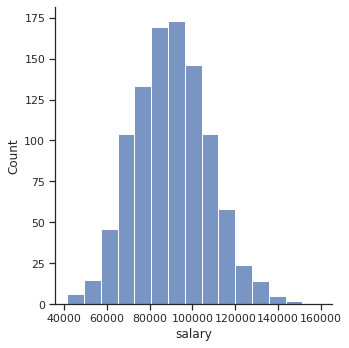

In [18]:
sns.set(style='ticks') #set style for background
#'darkgrid'/'whitegrid'/'white'/'dark'/'ticks'
# WILL SET STYLE FOR THE NOTEBOOK & INFLUENCE OTHER PLOTS
#
sns.displot(data=df, 
            x="salary",
            bins=15, #how many bins
            )